In [ ]:
# input: one vector in d-dim
# create input 'b' vectors in 'd' dimension
# function (matmul) -> 1*b matrix

In [76]:
import numpy as np
from numpy import matlib
import pandas as pd

#### steps for functions 
0) input two matrices X and Y 
1) measure the size of matrix and get a,b,d
2) check if d is consistent for X & Y
3) calculate the matrix of pairwise distances

def find_pairwise_dist(X,Y :np.array) -> np.array:

Library named: __

In [114]:
# Define the function that calculates the matrix of pairwise distances
def find_pairwise_dist(X,Y :np) -> np:
    # measure the size of matrix
    X_row = len(X)
    X_col = len(X[0])
    Y_row = len(Y)
    Y_col = len(Y[0])
    
    # check if dimension is consistent for X & Y
    if X_row != Y_row:
        print("Error. Please check the dimensions of the two matrices.")
    else:
        # squared norm for each column vector in X & Y
        X_norm2 = np.sum(X**2, axis=0)
        Y_norm2 = np.sum(Y**2, axis=0)

        # calculate distance matrix between ith vector in X and jth vector in Y
        X_norm2_b = np.matlib.repmat(X_norm2.reshape(X_col,1), 1, Y_col)
        Y_norm2_a = np.matlib.repmat(Y_norm2, X_col, 1)
        dist2_XY = X_norm2_b + Y_norm2_a - 2*np.matmul(np.transpose(X), Y)
        dist_XY = np.sqrt(np.maximum(0,dist2_XY))
        return dist_XY

In [113]:
testarray = np.array([0,1,2,-1,-2,3])

np.sqrt(np.maximum(0,testarray))


array([0.        , 1.        , 1.41421356, 0.        , 0.        ,
       1.73205081])

In [ ]:
from random import randrange
print(randrange(2))

In [ ]:
testX = np.array([0,1,1,1,1])
print(testX.argmax())


In [127]:
#INPUT (parameters)
#X is a d-by-a matrix with the datapoints
#n is the number of landmarks requested
# s is the seed index

def find_next_landmark(X:np, seed:int) -> int:
    seed_vector = X[:,seed].reshape((-1, 1)) #makes it into a column vector
    X_col = len(X[0]) #number of given data points
    #A = np.empty(shape=[0, X_col]) #creates an empty distance matrix 
    
    newrow = find_pairwise_dist(seed_vector, X) 
    newseed = newrow.argmax() #selects the first index for the largest number in the array (if there are repeated largest numbers)
    #A = np.vstack([A, newrow])

    return newseed, newrow
    
# for i in range(n):
#     final_function(X, n, find_landmarks_user_selects_seed(X, n, s))
    

In [79]:
X_matrix = np.random.randn(5,7)
X_matrix

array([[-0.3401869 , -0.49798252,  1.05961367,  0.12912502, -0.3741503 ,
         0.6415834 , -1.37992524],
       [-1.09935201, -1.85458102,  0.37928732,  0.12448412, -0.08191931,
         0.13385967, -1.74888177],
       [-1.02825287, -1.26933261,  0.68664877,  0.3091894 , -0.626589  ,
        -0.31250694, -0.72894058],
       [-0.68709344, -0.47807324,  0.04744856,  0.08560018,  1.90748771,
        -0.47605537, -0.53849867],
       [ 2.09587217, -0.19200277, -0.62560186,  0.25780402,  0.53984211,
         0.69045816,  0.12632711]])

In [128]:
def calculate_landmarks(X, n, s):
    newseed = s
    result = []
    for count in range(n):
        (newseed, A) = find_next_landmark(X, newseed)
        print(A, newseed)
    return result

In [129]:
calculate_landmarks(X_matrix, 5, 1)

[[2.43545703 0.         3.42144971 2.70587292 3.1300609  2.63567137
  1.0890381 ]] 2
[[3.87719956 3.42144971 0.         1.36200987 2.96833107 1.79982403
  3.6596555 ]] 0
[[0.         2.43545703 3.87719956 2.73538486 3.21725622 2.2397995
  2.34386876]] 2
[[3.87719956 3.42144971 0.         1.36200987 2.96833107 1.79982403
  3.6596555 ]] 0
[[0.         2.43545703 3.87719956 2.73538486 3.21725622 2.2397995
  2.34386876]] 2


[]

In [ ]:
#OUTPUT (returns)
#L is the list of landmark indices
#DL is the n-by-a matrix of landmark-to-fulldata distance#input (parameters)

#X is a d-by-a matrix with the datapoints
X_matrix = np.random.randn(5,7)
#n is the number of landmarks requested
n = 3
# s is the seed index 'a single number'  s<len(X[0])
s = 5
#seedvector
seed_vector = X_matrix[:,s]
newseed = find_next_landmark(X_matrix, s)

In [152]:
# parameters: X, seed, n
    # X: d-by-a matrix 
    # seed: index number
    # n: number of landmarks requested

# returns: L, DL 
    # L: landmarks (a list of length n)
    # DL: distance matrix from landmarks to data (n-by-a matrix)

def find_landmarks(X, seed, n):
    '''finds landmark points by maxmin algorithm'''
    # implicit parameter: number of data points
    a = len(X[0])

    # create a list of landmark and put seed (our zero-th landmark)
    L = [seed]

    # store the pairwise distance between the zero-th landmark and the rest of the points
    DL = np.zeros((n,a)) 
    seed_vector = X[:,seed].reshape((-1, 1)) #makes it into a column vector
    DLseed = find_pairwise_dist(seed_vector, X)
    DL[0,:] = DLseed

    # storing row of distances to the closest landmark
    DLmin = DLseed.copy()

    for count in range(1,n):

        # find new landmark and update list
        newlandmark = DLmin.argmax()
        L.append(newlandmark)

        # store the pairwise distance between the new landmark and the rest of the points
        newlandmark_vector = X[:,newlandmark].reshape((-1,1))
        newlandmarkrow = find_pairwise_dist(newlandmark_vector,X)
        DL[count,:] = newlandmarkrow

        # update row of distances to the closet landmark
        DLmin = np.minimum(DLmin, newlandmarkrow)

    return L, DL

In [192]:
#TRIAL RUN
# INPUT PARAMETERS
#X is a d-by-a matrix with the datapoints
X_matrix = np.random.randn(2,150)
#n is the number of landmarks requested
# s is the seed index 'a single number'  s<len(X[0])

In [193]:
(L, DL) = find_landmarks(X_matrix, 10, 30)

(-3.3402421844823196,
 2.50010348821253,
 -2.7796585388536403,
 3.1303796396688806)

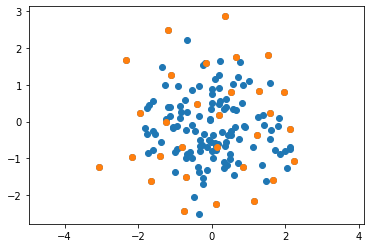

In [194]:
import matplotlib.pyplot as plt

plt.scatter(X_matrix[0], X_matrix[1])
plt.scatter(X_matrix[0][L], X_matrix[1][L])
plt.axis('equal')

In [137]:
D_l1 = np.array([2,3,0,1,2.5,8])
D_l2 = np.array([1,2,3,4,2.5,0])
DLmin = np.minimum(D_l1, D_l2)
print(DLmin)


[1.  2.  0.  1.  2.5 0. ]


In [148]:
x1 = np.array([[1,2,3],[4,5,6]])
print(x1)
print(x1[:,0].reshape((-1,1)))
#print(x1.transpose)

[[1 2 3]
 [4 5 6]]
[[1]
 [4]]


In [ ]:
seed_vector = X[:,s].reshape((-1, 1)) #makes it into a column vector
print(seed_vector)

In [ ]:
# finding distance matrix between user_input_vector (seed_vector) and all the points
#find_pairwise_dist(seed_vector,X)

A = np.empty(shape=[0, 7])
newrow = find_pairwise_dist(seed_vector, X) 
A = np.vstack([A, newrow])
A

In [ ]:
newseed = newrow.argmax()
seed_vector = X[:,newseed].reshape((-1, 1))
print(seed_vector)

In [ ]:
# Input d-by-a matrix, d-by-b matrix
X = np.random.randn(5,3)
Y = np.random.randn(5,5)

#Output a-by-b matrix
find_pairwise_dist(X,Y)

In [ ]:
a = 5
b = 4
d = 3

X = np.random.randn(d,a)
Y = np.random.randn(d,b)

In [ ]:
print(X)
print(Y)
# test1 = np.array([3.188, 1.065, 0.773])
# test2 = test1**2
# np.sqrt(np.sum(test2))

In [ ]:
np.set_printoptions(precision=3)
X_norm2 = np.sum(X**2, axis=0)
print(X_norm2)

Y_norm2 = np.sum(Y**2, axis=0)
print(Y_norm2)

In [ ]:
X_norm2_b = np.matlib.repmat(X_norm2.reshape(a,1), 1, b)
Y_norm2_a = np.matlib.repmat(Y_norm2, a, 1)

print(X_norm2_b)
print(Y_norm2_a)

In [ ]:
dist2_XY = X_norm2_b + Y_norm2_a - 2*np.matmul(np.transpose(X), Y)
dist_XY = np.sqrt(dist2_XY)
dist_XY

In [ ]:
a = 5
b = 4
d = 3

X = np.random.randn(d,a)

np.set_printoptions(precision=3)
X_norm2 = np.sum(X**2, axis=0)

X_norm2_b = np.matlib.repmat(X_norm2.reshape(a,1), 1, b)
print(X_norm2)
print(X_norm2.reshape(a,1))
print(np.transpose(X_norm2))
